In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

from os.path import isfile

from natsort import natsorted

# Make sure we can find lassi-analysis
import sys
sys.path.append('/home/scratch/psalas/LASSI/lassi-analysis_v2')

from lassiAnalysis import processLeicaScan

In [3]:
# Parameters for processing (segmenting and smoothing) the raw PTX data.
n = 512
rot = 80.
# Use the same setting as during the October 11 scans.
# These setting gave bad results.
# (check the .fits files in /home/gbtdata/TLASSI_200315/LASSI).
ellipse = [-44, -6.5, 49, 49, 0]
path = "/home/scratch/psalas/LASSI/15Mar"

/home/scratch/psalas/LASSI/15Mar/2020_03_16_09:01:35.ptx
Processing: /home/scratch/psalas/LASSI/15Mar/2020_03_16_09:01:35.ptx
Processing PTX file ...
ProcessNewPTXData with:  [-44, -6.5, 49, 49, 0]
Picking 10000 random data points from a total of 18572279
Skipped 0 non-data lines
Skipped 0 non-data lines
Starting with 18572279 lines of data
Filtered out 0 points of 18572279 ( 0.00%) intensity equal to zero
Now we have 18572279 lines of data
neighborFilter reduces 18572279 points to 18261718 points (310561 filtered, 1.672175 %) using tol: 0.122000
Now we have 18261718 lines of data
Intensity: max= 1.00, min= 0.00, mean= 0.63, std= 0.22
Elliptical fitler parameters:
[-44, -6.5, 49, 49, 0]
Filter removed 1636393 points outside the ellipse
The ellipse has semi-major axis 49.00 m, semi-minor axis 49.00 m and angle 0.00 degrees
Now we have 16625325 lines of data
z - limit filtered out 7448734 points below -80.00 and above -10
Removed 7448734 points closer than 10.00 m from the scanner.
Reloa

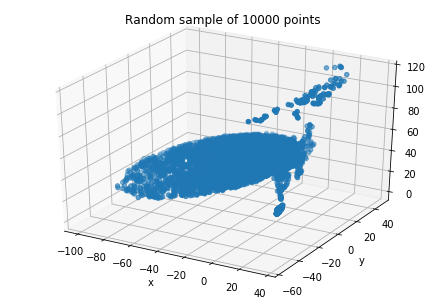

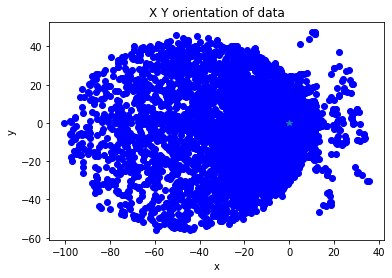

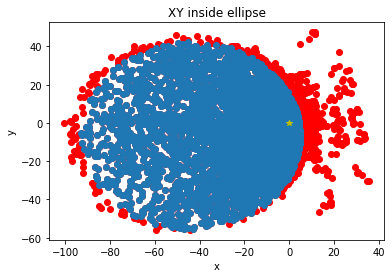

In [ ]:
# Only process a pair of scans, reference and signal.
fns = ["2020_03_16_09:01:35",
       "2020_03_16_09:09:14"]
for sn in fns:
    re = '{0}/{1}.ptx'.format(path, sn)
    print(re)
    fns = glob.glob(re)
    for fn in fns:
        print('Processing: {}'.format(fn))
        processLeicaScan(fn, N=n, rot=rot, ellipse=ellipse, plot=False)

In [4]:
# Only process a pair of scans, reference and signal.
fns = ["2020_03_16_05:22:24",
       "2020_03_16_05:30:05"]
for sn in fns:
    re = '{0}/{1}.ptx'.format(path, sn)
    print(re)
    fns = glob.glob(re)
    for fn in fns:
        print('Processing: {}'.format(fn))
        processLeicaScan(fn, N=n, rot=rot, ellipse=ellipse, plot=False)

/home/scratch/psalas/LASSI/15Mar/2020_03_16_05:22:24.ptx
Processing: /home/scratch/psalas/LASSI/15Mar/2020_03_16_05:22:24.ptx
Processing PTX file ...
ProcessNewPTXData with:  [-44, -6.5, 49, 49, 0]
Skipped 0 non-data lines
Starting with 18568119 lines of data
Filtered out 0 points of 18568119 ( 0.00%) intensity equal to zero
Now we have 18568119 lines of data
neighborFilter reduces 18568119 points to 18258308 points (309811 filtered, 1.668510 %) using tol: 0.122000
Now we have 18258308 lines of data
Intensity: max= 1.00, min= 0.00, mean= 0.64, std= 0.22
Elliptical fitler parameters:
[-44, -6.5, 49, 49, 0]
Filter removed 1632972 points outside the ellipse
The ellipse has semi-major axis 49.00 m, semi-minor axis 49.00 m and angle 0.00 degrees
Now we have 16625336 lines of data
z - limit filtered out 7449225 points below -80.00 and above -10
Removed 7449225 points closer than 10.00 m from the scanner.
Reloaded 18568119 lines of data.
neighborFilter reduces 18568119 points to 18258308 poin

In [6]:
ptx_files = natsorted(glob.glob("{0}/*.ptx".format(path)))

for fn in ptx_files:
    csvFile = fn.replace(".ptx", ".ptx.csv")
    if not isfile(csvFile):
            print("Processing: {}".format(fn))
            try:
                processLeicaScan(fn, N=n, rot=rot, ellipse=ellipse, plot=False)
            except ValueError:
                print("File corrupted?")
    else:
        print("File already processed.")        

Processing: /home/scratch/psalas/LASSI/15Mar/2020_03_16_00:17:26.ptx
Processing PTX file ...
ProcessNewPTXData with:  [-44, -6.5, 49, 49, 0]
Skipped 0 non-data lines
Starting with 2342829 lines of data
Filtered out 0 points of 2342829 ( 0.00%) intensity equal to zero
Now we have 2342829 lines of data
neighborFilter reduces 2342829 points to 2219893 points (122936 filtered, 5.247331 %) using tol: 0.122000
Now we have 2219893 lines of data
Intensity: max= 1.00, min= 0.00, mean= 0.71, std= 0.20
Elliptical fitler parameters:
[-44, -6.5, 49, 49, 0]
Filter removed 66173 points outside the ellipse
The ellipse has semi-major axis 49.00 m, semi-minor axis 49.00 m and angle 0.00 degrees
Now we have 2153720 lines of data
z - limit filtered out 320090 points below -80.00 and above -10
Removed 320090 points closer than 10.00 m from the scanner.
Reloaded 2342829 lines of data.
neighborFilter reduces 2342829 points to 2219893 points (122936 filtered, 5.247331 %) using tol: 0.122000
Parabola filter wi

Now we have 2497784 lines of data
XYZ output of ProcessNewPTXData has 2497784 lines of data.
Intensity output of ProcessNewPTXData has 2497784 lines of data.
Writing out dish xyz coordinates to: /home/scratch/psalas/LASSI/15Mar/2020_03_16_00:51:09.ptx.csv
Writing out associated intensities to: /home/scratch/psalas/LASSI/15Mar/2020_03_16_00:51:09.ptx_int.processed.csv
Elapsed minutes:  0.72
Smoothing data ...
smoothGPUParallel:  512 /home/scratch/psalas/LASSI/15Mar/2020_03_16_00:51:09.ptx.csv
infiles:  ['/home/scratch/psalas/LASSI/15Mar/2020_03_16_00:51:09.ptx.csv']
Copy files elapsed seconds:  7.367134094238281e-05
cmd:  ['/home/scratch/psalas/LASSI/lassi-analysis_v2/runGpuParts', '/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1', 'psalas', 'devenv-hpc1', '/home/scratch/psalas/LASSI/15Mar/2020_03_16_00:51:09.ptx.csv', '2020_03_16_00:51:09.ptx.csv', '512', '1', '1']
called command:  ['/home/scratch/psalas/LASSI/lassi-analysis_v2/runGpuParts', '/home/scratch/psalas/LASSI/gpus/versio

Smoothed data to shape:  (262144,) (262144,) (262144,)
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_01:00:19.ptx.csv.x.csv
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_01:00:19.ptx.csv.y.csv
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_01:00:19.ptx.csv.z.csv
Elapsed minutes:  3.03
Processing: /home/scratch/psalas/LASSI/15Mar/2020_03_16_01:04:36.ptx
Processing PTX file ...
ProcessNewPTXData with:  [-44, -6.5, 49, 49, 0]
Skipped 0 non-data lines
Starting with 4648331 lines of data
Filtered out 0 points of 4648331 ( 0.00%) intensity equal to zero
Now we have 4648331 lines of data
neighborFilter reduces 4648331 points to 4490590 points (157741 filtered, 3.393498 %) using tol: 0.122000
Now we have 4490590 lines of data
Intensity: max= 1.00, min= 0.00, mean= 0.61, std= 0.21
Elliptical fitler parameters:
[-44, -6.5, 49, 49, 0]
Filter removed 338127 points outside the ellipse
The ellipse has semi-major ax

Reloaded 18560276 lines of data.
neighborFilter reduces 18560276 points to 18251478 points (308798 filtered, 1.663758 %) using tol: 0.122000
Parabola filter will remove 44.67% of the data.
Keeping 10099232 out of 18251478 points.
Keeping 10097913 points inside a circle of radius 51 m and center (-52.207525007949926,-7.211646032256894) m.
Rotating about Z by 80.00 degrees
Now we have 10097913 lines of data
XYZ output of ProcessNewPTXData has 10097913 lines of data.
Intensity output of ProcessNewPTXData has 10097913 lines of data.
Writing out dish xyz coordinates to: /home/scratch/psalas/LASSI/15Mar/2020_03_16_02:28:31.ptx.csv
Writing out associated intensities to: /home/scratch/psalas/LASSI/15Mar/2020_03_16_02:28:31.ptx_int.processed.csv
Elapsed minutes:  2.96
Smoothing data ...
smoothGPUParallel:  512 /home/scratch/psalas/LASSI/15Mar/2020_03_16_02:28:31.ptx.csv
infiles:  ['/home/scratch/psalas/LASSI/15Mar/2020_03_16_02:28:31.ptx.csv']
Copy files elapsed seconds:  9.1552734375e-05
cmd: 

multiple GPU commands finished
/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_02:45:43.ptx.csv.x.csv
GPUs created file:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_02:45:43.ptx.csv.x.csv
/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_02:45:43.ptx.csv.y.csv
GPUs created file:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_02:45:43.ptx.csv.y.csv
/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_02:45:43.ptx.csv.z.csv
GPUs created file:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_02:45:43.ptx.csv.z.csv
Loading from basename:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_02:45:43.ptx.csv
Smoothed data to shape:  (262144,) (262144,) (262144,)
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_02:45:43.ptx.csv.x.csv
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_02:45:43.ptx.csv.y.csv
Saving smoothed data to: /home/

ProcessNewPTXData with:  [-44, -6.5, 49, 49, 0]
Skipped 0 non-data lines
Starting with 18564551 lines of data
Filtered out 0 points of 18564551 ( 0.00%) intensity equal to zero
Now we have 18564551 lines of data
neighborFilter reduces 18564551 points to 18254568 points (309983 filtered, 1.669758 %) using tol: 0.122000
Now we have 18254568 lines of data
Intensity: max= 1.00, min= 0.00, mean= 0.63, std= 0.22
Elliptical fitler parameters:
[-44, -6.5, 49, 49, 0]
Filter removed 1629454 points outside the ellipse
The ellipse has semi-major axis 49.00 m, semi-minor axis 49.00 m and angle 0.00 degrees
Now we have 16625114 lines of data
z - limit filtered out 7449186 points below -80.00 and above -10
Removed 7449186 points closer than 10.00 m from the scanner.
Reloaded 18564551 lines of data.
neighborFilter reduces 18564551 points to 18254568 points (309983 filtered, 1.669758 %) using tol: 0.122000
Parabola filter will remove 44.66% of the data.
Keeping 10101436 out of 18254568 points.
Keeping 

Writing out associated intensities to: /home/scratch/psalas/LASSI/15Mar/2020_03_16_03:27:25.ptx_int.processed.csv
Elapsed minutes:  2.83
Smoothing data ...
smoothGPUParallel:  512 /home/scratch/psalas/LASSI/15Mar/2020_03_16_03:27:25.ptx.csv
infiles:  ['/home/scratch/psalas/LASSI/15Mar/2020_03_16_03:27:25.ptx.csv']
Copy files elapsed seconds:  0.000270843505859375
cmd:  ['/home/scratch/psalas/LASSI/lassi-analysis_v2/runGpuParts', '/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1', 'psalas', 'devenv-hpc1', '/home/scratch/psalas/LASSI/15Mar/2020_03_16_03:27:25.ptx.csv', '2020_03_16_03:27:25.ptx.csv', '512', '1', '1']
called command:  ['/home/scratch/psalas/LASSI/lassi-analysis_v2/runGpuParts', '/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1', 'psalas', 'devenv-hpc1', '/home/scratch/psalas/LASSI/15Mar/2020_03_16_03:27:25.ptx.csv', '2020_03_16_03:27:25.ptx.csv', '512', '1', '1']
waiting for all commands to finish ...
multiple GPU commands finished
/home/scratch/psalas/LASSI/gpus/v

Smoothed data to shape:  (262144,) (262144,) (262144,)
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_03:44:25.ptx.csv.x.csv
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_03:44:25.ptx.csv.y.csv
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_03:44:25.ptx.csv.z.csv
Elapsed minutes:  7.64
Processing: /home/scratch/psalas/LASSI/15Mar/2020_03_16_03:52:01.ptx
Processing PTX file ...
ProcessNewPTXData with:  [-44, -6.5, 49, 49, 0]
Skipped 0 non-data lines
Starting with 18566341 lines of data
Filtered out 0 points of 18566341 ( 0.00%) intensity equal to zero
Now we have 18566341 lines of data
neighborFilter reduces 18566341 points to 18256671 points (309670 filtered, 1.667911 %) using tol: 0.122000
Now we have 18256671 lines of data
Intensity: max= 1.00, min= 0.00, mean= 0.64, std= 0.22
Elliptical fitler parameters:
[-44, -6.5, 49, 49, 0]
Filter removed 1631510 points outside the ellipse
The ellipse has semi-m

Removed 7449183 points closer than 10.00 m from the scanner.
Reloaded 18566924 lines of data.
neighborFilter reduces 18566924 points to 18256969 points (309955 filtered, 1.669393 %) using tol: 0.122000
Parabola filter will remove 44.69% of the data.
Keeping 10097257 out of 18256969 points.
Keeping 10095911 points inside a circle of radius 51 m and center (-52.20688285924052,-7.215142894867611) m.
Rotating about Z by 80.00 degrees
Now we have 10095911 lines of data
XYZ output of ProcessNewPTXData has 10095911 lines of data.
Intensity output of ProcessNewPTXData has 10095911 lines of data.
Writing out dish xyz coordinates to: /home/scratch/psalas/LASSI/15Mar/2020_03_16_04:09:06.ptx.csv
Writing out associated intensities to: /home/scratch/psalas/LASSI/15Mar/2020_03_16_04:09:06.ptx_int.processed.csv
Elapsed minutes:  2.76
Smoothing data ...
smoothGPUParallel:  512 /home/scratch/psalas/LASSI/15Mar/2020_03_16_04:09:06.ptx.csv
infiles:  ['/home/scratch/psalas/LASSI/15Mar/2020_03_16_04:09:06.p

multiple GPU commands finished
/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_04:26:00.ptx.csv.x.csv
GPUs created file:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_04:26:00.ptx.csv.x.csv
/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_04:26:00.ptx.csv.y.csv
GPUs created file:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_04:26:00.ptx.csv.y.csv
/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_04:26:00.ptx.csv.z.csv
GPUs created file:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_04:26:00.ptx.csv.z.csv
Loading from basename:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_04:26:00.ptx.csv
Smoothed data to shape:  (262144,) (262144,) (262144,)
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_04:26:00.ptx.csv.x.csv
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_04:26:00.ptx.csv.y.csv
Saving smoothed data to: /home/

ProcessNewPTXData with:  [-44, -6.5, 49, 49, 0]
Skipped 0 non-data lines
Starting with 18566906 lines of data
Filtered out 0 points of 18566906 ( 0.00%) intensity equal to zero
Now we have 18566906 lines of data
neighborFilter reduces 18566906 points to 18257095 points (309811 filtered, 1.668619 %) using tol: 0.122000
Now we have 18257095 lines of data
Intensity: max= 1.00, min= 0.00, mean= 0.64, std= 0.22
Elliptical fitler parameters:
[-44, -6.5, 49, 49, 0]
Filter removed 1631965 points outside the ellipse
The ellipse has semi-major axis 49.00 m, semi-minor axis 49.00 m and angle 0.00 degrees
Now we have 16625130 lines of data
z - limit filtered out 7449222 points below -80.00 and above -10
Removed 7449222 points closer than 10.00 m from the scanner.
Reloaded 18566906 lines of data.
neighborFilter reduces 18566906 points to 18257095 points (309811 filtered, 1.668619 %) using tol: 0.122000
Parabola filter will remove 44.67% of the data.
Keeping 10101615 out of 18257095 points.
Keeping 

Writing out associated intensities to: /home/scratch/psalas/LASSI/15Mar/2020_03_16_05:05:43.ptx_int.processed.csv
Elapsed minutes:  2.70
Smoothing data ...
smoothGPUParallel:  512 /home/scratch/psalas/LASSI/15Mar/2020_03_16_05:05:43.ptx.csv
infiles:  ['/home/scratch/psalas/LASSI/15Mar/2020_03_16_05:05:43.ptx.csv']
Copy files elapsed seconds:  1.2874603271484375e-05
cmd:  ['/home/scratch/psalas/LASSI/lassi-analysis_v2/runGpuParts', '/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1', 'psalas', 'devenv-hpc1', '/home/scratch/psalas/LASSI/15Mar/2020_03_16_05:05:43.ptx.csv', '2020_03_16_05:05:43.ptx.csv', '512', '1', '1']
called command:  ['/home/scratch/psalas/LASSI/lassi-analysis_v2/runGpuParts', '/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1', 'psalas', 'devenv-hpc1', '/home/scratch/psalas/LASSI/15Mar/2020_03_16_05:05:43.ptx.csv', '2020_03_16_05:05:43.ptx.csv', '512', '1', '1']
waiting for all commands to finish ...
multiple GPU commands finished
/home/scratch/psalas/LASSI/gpus

Smoothed data to shape:  (262144,) (262144,) (262144,)
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_05:22:24.ptx.csv.x.csv
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_05:22:24.ptx.csv.y.csv
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_05:22:24.ptx.csv.z.csv
Elapsed minutes:  7.63
Processing: /home/scratch/psalas/LASSI/15Mar/2020_03_16_05:30:05.ptx
Processing PTX file ...
ProcessNewPTXData with:  [-44, -6.5, 49, 49, 0]
Skipped 0 non-data lines
Starting with 18568119 lines of data
Filtered out 0 points of 18568119 ( 0.00%) intensity equal to zero
Now we have 18568119 lines of data
neighborFilter reduces 18568119 points to 18257832 points (310287 filtered, 1.671074 %) using tol: 0.122000
Now we have 18257832 lines of data
Intensity: max= 1.00, min= 0.00, mean= 0.64, std= 0.22
Elliptical fitler parameters:
[-44, -6.5, 49, 49, 0]
Filter removed 1632554 points outside the ellipse
The ellipse has semi-m

Removed 7449183 points closer than 10.00 m from the scanner.
Reloaded 18568669 lines of data.
neighborFilter reduces 18568669 points to 18258522 points (310147 filtered, 1.670270 %) using tol: 0.122000
Parabola filter will remove 44.69% of the data.
Keeping 10099292 out of 18258522 points.
Keeping 10097899 points inside a circle of radius 51 m and center (-52.197752191580506,-7.203703764000998) m.
Rotating about Z by 80.00 degrees
Now we have 10097899 lines of data
XYZ output of ProcessNewPTXData has 10097899 lines of data.
Intensity output of ProcessNewPTXData has 10097899 lines of data.
Writing out dish xyz coordinates to: /home/scratch/psalas/LASSI/15Mar/2020_03_16_05:47:09.ptx.csv
Writing out associated intensities to: /home/scratch/psalas/LASSI/15Mar/2020_03_16_05:47:09.ptx_int.processed.csv
Elapsed minutes:  2.74
Smoothing data ...
smoothGPUParallel:  512 /home/scratch/psalas/LASSI/15Mar/2020_03_16_05:47:09.ptx.csv
infiles:  ['/home/scratch/psalas/LASSI/15Mar/2020_03_16_05:47:09.

multiple GPU commands finished
/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_06:03:57.ptx.csv.x.csv
GPUs created file:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_06:03:57.ptx.csv.x.csv
/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_06:03:57.ptx.csv.y.csv
GPUs created file:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_06:03:57.ptx.csv.y.csv
/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_06:03:57.ptx.csv.z.csv
GPUs created file:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_06:03:57.ptx.csv.z.csv
Loading from basename:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_06:03:57.ptx.csv
Smoothed data to shape:  (262144,) (262144,) (262144,)
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_06:03:57.ptx.csv.x.csv
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_06:03:57.ptx.csv.y.csv
Saving smoothed data to: /home/

ProcessNewPTXData with:  [-44, -6.5, 49, 49, 0]
Skipped 0 non-data lines
Starting with 18570002 lines of data
Filtered out 0 points of 18570002 ( 0.00%) intensity equal to zero
Now we have 18570002 lines of data
neighborFilter reduces 18570002 points to 18259468 points (310534 filtered, 1.672235 %) using tol: 0.122000
Now we have 18259468 lines of data
Intensity: max= 1.00, min= 0.00, mean= 0.64, std= 0.22
Elliptical fitler parameters:
[-44, -6.5, 49, 49, 0]
Filter removed 1634162 points outside the ellipse
The ellipse has semi-major axis 49.00 m, semi-minor axis 49.00 m and angle 0.00 degrees
Now we have 16625306 lines of data
z - limit filtered out 7449213 points below -80.00 and above -10
Removed 7449213 points closer than 10.00 m from the scanner.
Reloaded 18570002 lines of data.
neighborFilter reduces 18570002 points to 18259468 points (310534 filtered, 1.672235 %) using tol: 0.122000
Parabola filter will remove 44.70% of the data.
Keeping 10098222 out of 18259468 points.
Keeping 

Writing out associated intensities to: /home/scratch/psalas/LASSI/15Mar/2020_03_16_06:43:17.ptx_int.processed.csv
Elapsed minutes:  2.71
Smoothing data ...
smoothGPUParallel:  512 /home/scratch/psalas/LASSI/15Mar/2020_03_16_06:43:17.ptx.csv
infiles:  ['/home/scratch/psalas/LASSI/15Mar/2020_03_16_06:43:17.ptx.csv']
Copy files elapsed seconds:  0.00010061264038085938
cmd:  ['/home/scratch/psalas/LASSI/lassi-analysis_v2/runGpuParts', '/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1', 'psalas', 'devenv-hpc1', '/home/scratch/psalas/LASSI/15Mar/2020_03_16_06:43:17.ptx.csv', '2020_03_16_06:43:17.ptx.csv', '512', '1', '1']
called command:  ['/home/scratch/psalas/LASSI/lassi-analysis_v2/runGpuParts', '/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1', 'psalas', 'devenv-hpc1', '/home/scratch/psalas/LASSI/15Mar/2020_03_16_06:43:17.ptx.csv', '2020_03_16_06:43:17.ptx.csv', '512', '1', '1']
waiting for all commands to finish ...
multiple GPU commands finished
/home/scratch/psalas/LASSI/gpus

Smoothed data to shape:  (262144,) (262144,) (262144,)
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_07:00:20.ptx.csv.x.csv
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_07:00:20.ptx.csv.y.csv
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_07:00:20.ptx.csv.z.csv
Elapsed minutes:  7.63
Processing: /home/scratch/psalas/LASSI/15Mar/2020_03_16_07:07:49.ptx
Processing PTX file ...
ProcessNewPTXData with:  [-44, -6.5, 49, 49, 0]
Skipped 0 non-data lines
Starting with 18571754 lines of data
Filtered out 0 points of 18571754 ( 0.00%) intensity equal to zero
Now we have 18571754 lines of data
neighborFilter reduces 18571754 points to 18261097 points (310657 filtered, 1.672739 %) using tol: 0.122000
Now we have 18261097 lines of data
Intensity: max= 1.00, min= 0.00, mean= 0.64, std= 0.23
Elliptical fitler parameters:
[-44, -6.5, 49, 49, 0]
Filter removed 1635802 points outside the ellipse
The ellipse has semi-m

Removed 7449067 points closer than 10.00 m from the scanner.
Reloaded 18571424 lines of data.
neighborFilter reduces 18571424 points to 18261220 points (310204 filtered, 1.670330 %) using tol: 0.122000
Parabola filter will remove 44.68% of the data.
Keeping 10101685 out of 18261220 points.
Keeping 10100332 points inside a circle of radius 51 m and center (-52.2055859629603,-7.178482813907102) m.
Rotating about Z by 80.00 degrees
Now we have 10100332 lines of data
XYZ output of ProcessNewPTXData has 10100332 lines of data.
Intensity output of ProcessNewPTXData has 10100332 lines of data.
Writing out dish xyz coordinates to: /home/scratch/psalas/LASSI/15Mar/2020_03_16_07:24:39.ptx.csv
Writing out associated intensities to: /home/scratch/psalas/LASSI/15Mar/2020_03_16_07:24:39.ptx_int.processed.csv
Elapsed minutes:  2.74
Smoothing data ...
smoothGPUParallel:  512 /home/scratch/psalas/LASSI/15Mar/2020_03_16_07:24:39.ptx.csv
infiles:  ['/home/scratch/psalas/LASSI/15Mar/2020_03_16_07:24:39.pt

multiple GPU commands finished
/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_07:41:29.ptx.csv.x.csv
GPUs created file:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_07:41:29.ptx.csv.x.csv
/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_07:41:29.ptx.csv.y.csv
GPUs created file:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_07:41:29.ptx.csv.y.csv
/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_07:41:29.ptx.csv.z.csv
GPUs created file:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_07:41:29.ptx.csv.z.csv
Loading from basename:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_07:41:29.ptx.csv
Smoothed data to shape:  (262144,) (262144,) (262144,)
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_07:41:29.ptx.csv.x.csv
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_07:41:29.ptx.csv.y.csv
Saving smoothed data to: /home/

ProcessNewPTXData with:  [-44, -6.5, 49, 49, 0]
Skipped 0 non-data lines
Starting with 18571612 lines of data
Filtered out 0 points of 18571612 ( 0.00%) intensity equal to zero
Now we have 18571612 lines of data
neighborFilter reduces 18571612 points to 18261259 points (310353 filtered, 1.671115 %) using tol: 0.122000
Now we have 18261259 lines of data
Intensity: max= 1.00, min= 0.00, mean= 0.64, std= 0.22
Elliptical fitler parameters:
[-44, -6.5, 49, 49, 0]
Filter removed 1635761 points outside the ellipse
The ellipse has semi-major axis 49.00 m, semi-minor axis 49.00 m and angle 0.00 degrees
Now we have 16625498 lines of data
z - limit filtered out 7449045 points below -80.00 and above -10
Removed 7449045 points closer than 10.00 m from the scanner.
Reloaded 18571612 lines of data.
neighborFilter reduces 18571612 points to 18261259 points (310353 filtered, 1.671115 %) using tol: 0.122000
Parabola filter will remove 44.68% of the data.
Keeping 10101281 out of 18261259 points.
Keeping 

Writing out associated intensities to: /home/scratch/psalas/LASSI/15Mar/2020_03_16_08:20:16.ptx_int.processed.csv
Elapsed minutes:  2.78
Smoothing data ...
smoothGPUParallel:  512 /home/scratch/psalas/LASSI/15Mar/2020_03_16_08:20:16.ptx.csv
infiles:  ['/home/scratch/psalas/LASSI/15Mar/2020_03_16_08:20:16.ptx.csv']
Copy files elapsed seconds:  0.0001327991485595703
cmd:  ['/home/scratch/psalas/LASSI/lassi-analysis_v2/runGpuParts', '/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1', 'psalas', 'devenv-hpc1', '/home/scratch/psalas/LASSI/15Mar/2020_03_16_08:20:16.ptx.csv', '2020_03_16_08:20:16.ptx.csv', '512', '1', '1']
called command:  ['/home/scratch/psalas/LASSI/lassi-analysis_v2/runGpuParts', '/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1', 'psalas', 'devenv-hpc1', '/home/scratch/psalas/LASSI/15Mar/2020_03_16_08:20:16.ptx.csv', '2020_03_16_08:20:16.ptx.csv', '512', '1', '1']
waiting for all commands to finish ...
multiple GPU commands finished
/home/scratch/psalas/LASSI/gpus/

Smoothed data to shape:  (262144,) (262144,) (262144,)
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_08:37:03.ptx.csv.x.csv
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_08:37:03.ptx.csv.y.csv
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_08:37:03.ptx.csv.z.csv
Elapsed minutes:  7.64
Processing: /home/scratch/psalas/LASSI/15Mar/2020_03_16_08:44:29.ptx
Processing PTX file ...
ProcessNewPTXData with:  [-44, -6.5, 49, 49, 0]
Skipped 0 non-data lines
Starting with 18571619 lines of data
Filtered out 0 points of 18571619 ( 0.00%) intensity equal to zero
Now we have 18571619 lines of data
neighborFilter reduces 18571619 points to 18261038 points (310581 filtered, 1.672342 %) using tol: 0.122000
Now we have 18261038 lines of data
Intensity: max= 1.00, min= 0.00, mean= 0.64, std= 0.22
Elliptical fitler parameters:
[-44, -6.5, 49, 49, 0]
Filter removed 1635803 points outside the ellipse
The ellipse has semi-m

Removed 7448734 points closer than 10.00 m from the scanner.
Reloaded 18572279 lines of data.
neighborFilter reduces 18572279 points to 18261718 points (310561 filtered, 1.672175 %) using tol: 0.122000
Parabola filter will remove 44.68% of the data.
Keeping 10102724 out of 18261718 points.
Keeping 10101356 points inside a circle of radius 51 m and center (-52.204321201738466,-7.205855309288054) m.
Rotating about Z by 80.00 degrees
Now we have 10101356 lines of data
XYZ output of ProcessNewPTXData has 10101356 lines of data.
Intensity output of ProcessNewPTXData has 10101356 lines of data.
Writing out dish xyz coordinates to: /home/scratch/psalas/LASSI/15Mar/2020_03_16_09:01:35.ptx.csv
Writing out associated intensities to: /home/scratch/psalas/LASSI/15Mar/2020_03_16_09:01:35.ptx_int.processed.csv
Elapsed minutes:  2.74
Smoothing data ...
smoothGPUParallel:  512 /home/scratch/psalas/LASSI/15Mar/2020_03_16_09:01:35.ptx.csv
infiles:  ['/home/scratch/psalas/LASSI/15Mar/2020_03_16_09:01:35.

multiple GPU commands finished
/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_09:18:36.ptx.csv.x.csv
GPUs created file:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_09:18:36.ptx.csv.x.csv
/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_09:18:36.ptx.csv.y.csv
GPUs created file:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_09:18:36.ptx.csv.y.csv
/home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_09:18:36.ptx.csv.z.csv
GPUs created file:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_09:18:36.ptx.csv.z.csv
Loading from basename:  /home/scratch/psalas/LASSI/gpus/versions/devenv-hpc1/2020_03_16_09:18:36.ptx.csv
Smoothed data to shape:  (262144,) (262144,) (262144,)
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_09:18:36.ptx.csv.x.csv
Saving smoothed data to: /home/scratch/psalas/LASSI/gpus/output/2020_03_16_09:18:36.ptx.csv.y.csv
Saving smoothed data to: /home/

ProcessNewPTXData with:  [-44, -6.5, 49, 49, 0]
Skipped 0 non-data lines
Starting with 18563962 lines of data
Filtered out 0 points of 18563962 ( 0.00%) intensity equal to zero
Now we have 18563962 lines of data
neighborFilter reduces 18563962 points to 18253525 points (310437 filtered, 1.672256 %) using tol: 0.122000
Now we have 18253525 lines of data
Intensity: max= 1.00, min= 0.00, mean= 0.64, std= 0.22
Elliptical fitler parameters:
[-44, -6.5, 49, 49, 0]
Filter removed 1630449 points outside the ellipse
The ellipse has semi-major axis 49.00 m, semi-minor axis 49.00 m and angle 0.00 degrees
Now we have 16623076 lines of data
z - limit filtered out 7449189 points below -80.00 and above -10
Removed 7449189 points closer than 10.00 m from the scanner.
Reloaded 18563962 lines of data.
neighborFilter reduces 18563962 points to 18253525 points (310437 filtered, 1.672256 %) using tol: 0.122000
Parabola filter will remove 44.67% of the data.
Keeping 10099168 out of 18253525 points.
Keeping 

KeyboardInterrupt: 